## $\textit{Imported Libraries}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.fft import rfft, rfftfreq
from scipy.optimize import curve_fit



# Analysis of pulsar data

In [2]:
data1 = np.loadtxt('pulsar_data.txt')



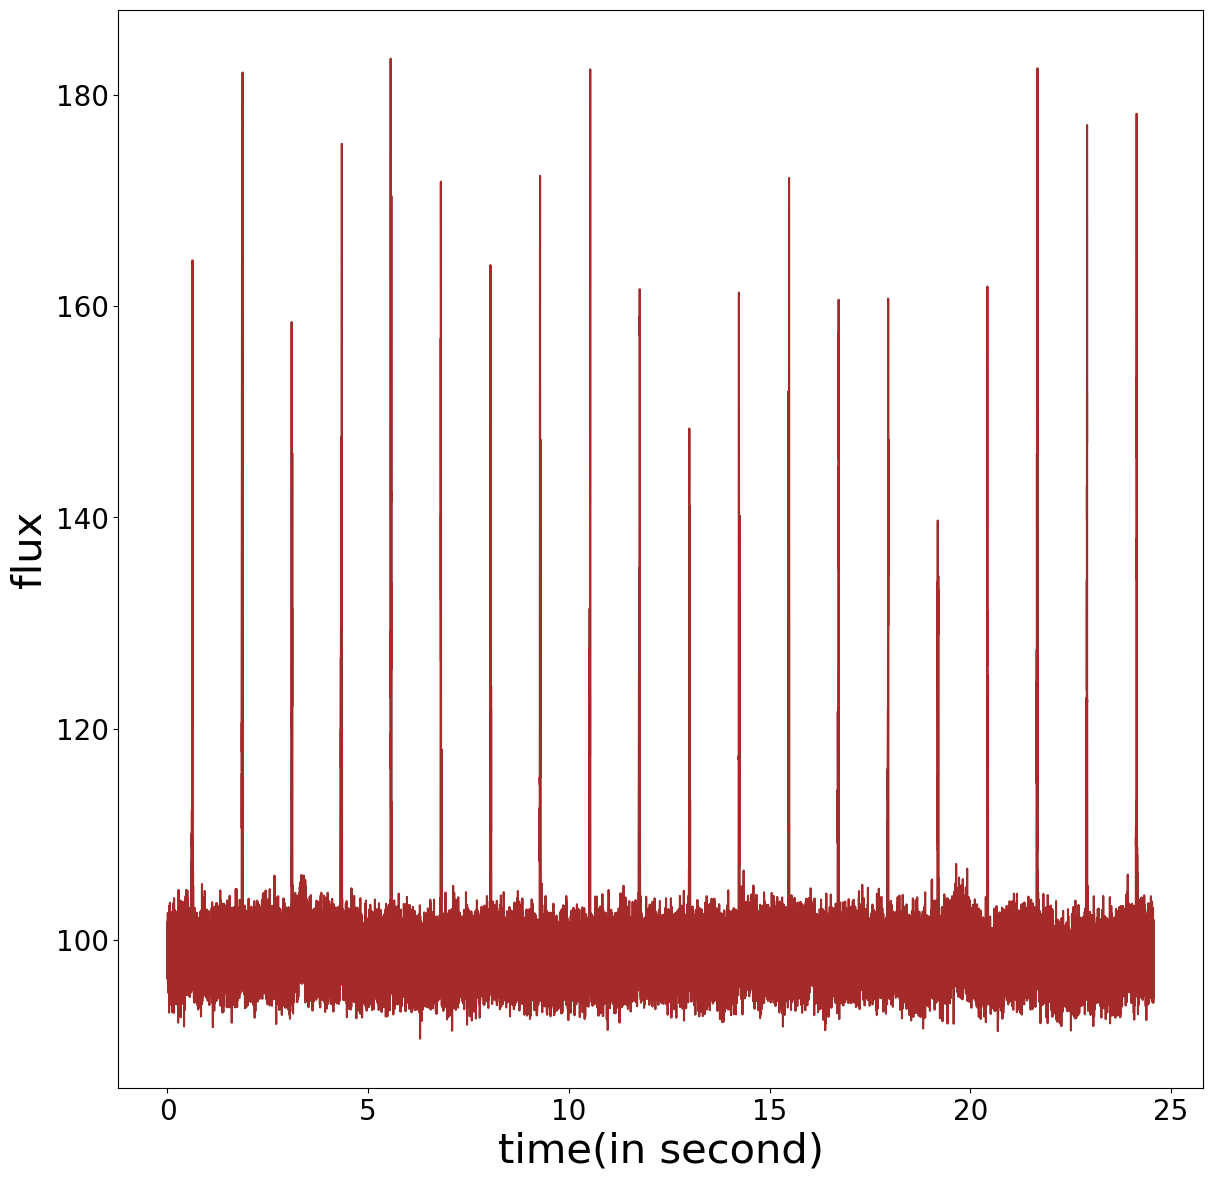

In [3]:
pulsar = data1[:,1]
pulsar = pulsar
#print(y)
time = data1[:,0]
#print(len(x))
plt.figure(figsize=(14,14))
plt.plot(time,pulsar,color='brown')
plt.xlabel('time(in second)',fontsize=30)
plt.ylabel('flux',fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig("FFT1N.pdf")

plt.show()





In [4]:
resolution = time[11]-time[10]
print(resolution)


0.0002457599999999998


# FFT of pulsar data

time resolution is 0.00025 second


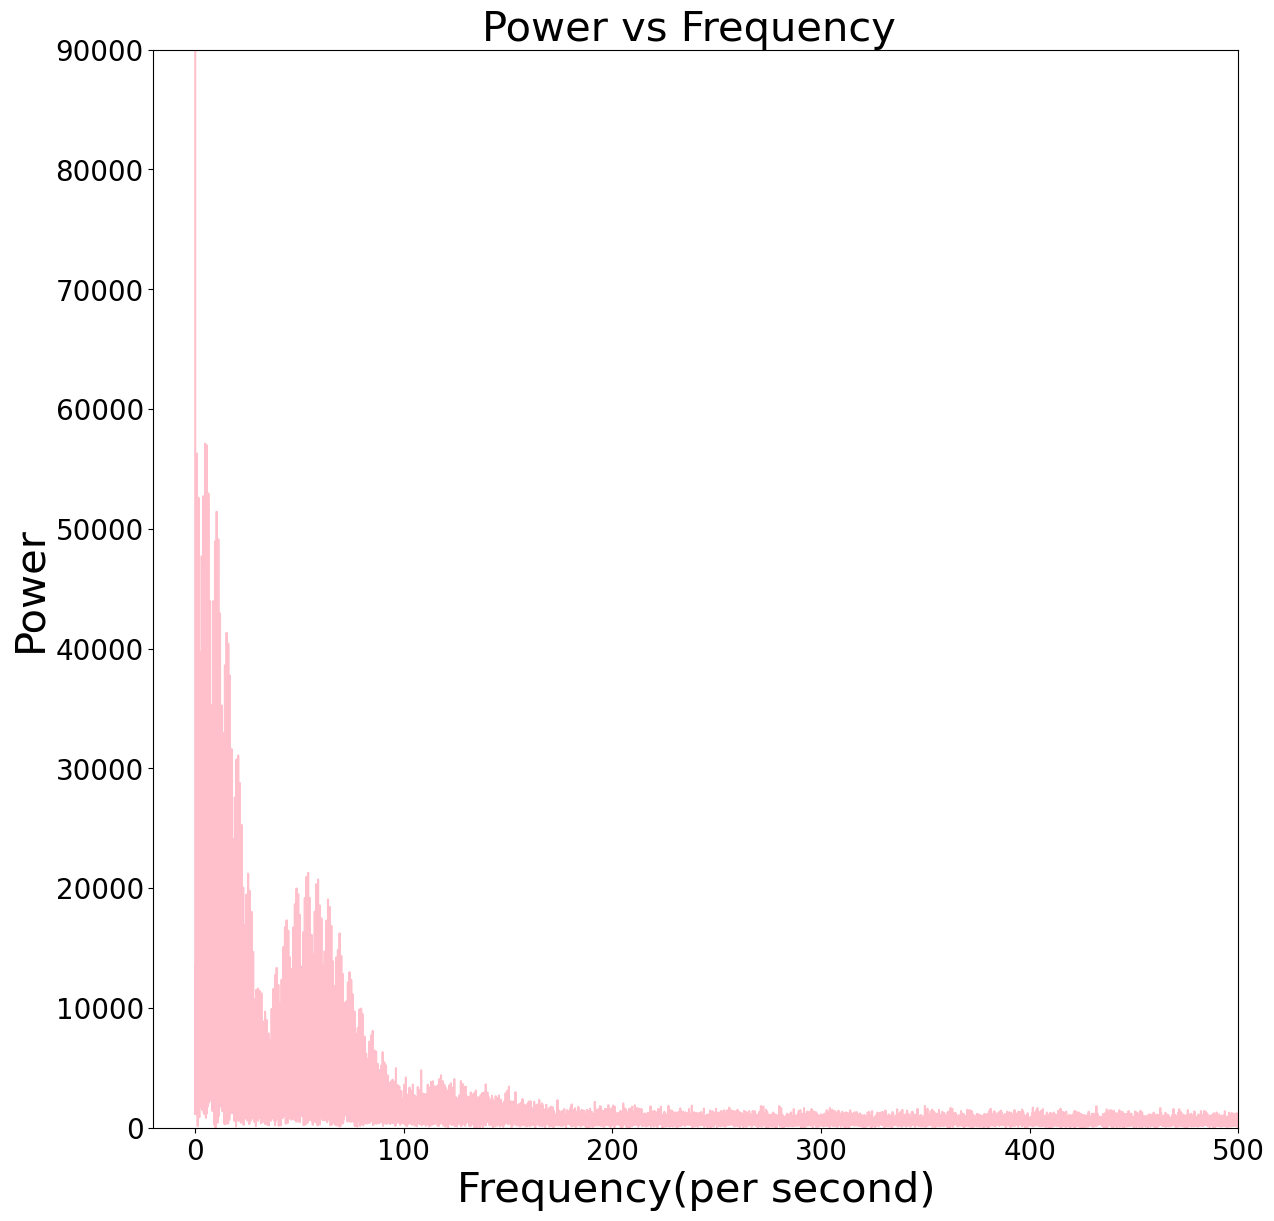

In [6]:
# Number of samples in normalized_tone
duretion = 25
N = 100000                    # number of data points
sample_rate = N / duretion

time_resolution = 1/sample_rate
print("time resolution is",time_resolution,'second')

#print(N)

yf = rfft(pulsar)
Amplitude = np.abs(yf)
xf = rfftfreq(N, 1 / sample_rate)
#print(Amplitude)
plt.figure(figsize=(14,14))
plt.plot(xf,Amplitude,color="pink")
plt.xlabel("Frequency(per second)",fontsize=30)
plt.ylabel("Power",fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(-20,500)
plt.ylim(0,90000)
plt.title("Power vs Frequency ",fontsize=30)
plt.savefig("FFT2N.pdf")
plt.show()

# Analysis with log values of data

/tmp/ipykernel_15797/2811574534.py:2: RuntimeWarning: divide by zero encountered in log10
  log_freq = np.log10(xf)
/tmp/ipykernel_15797/2811574534.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor',axis='x')


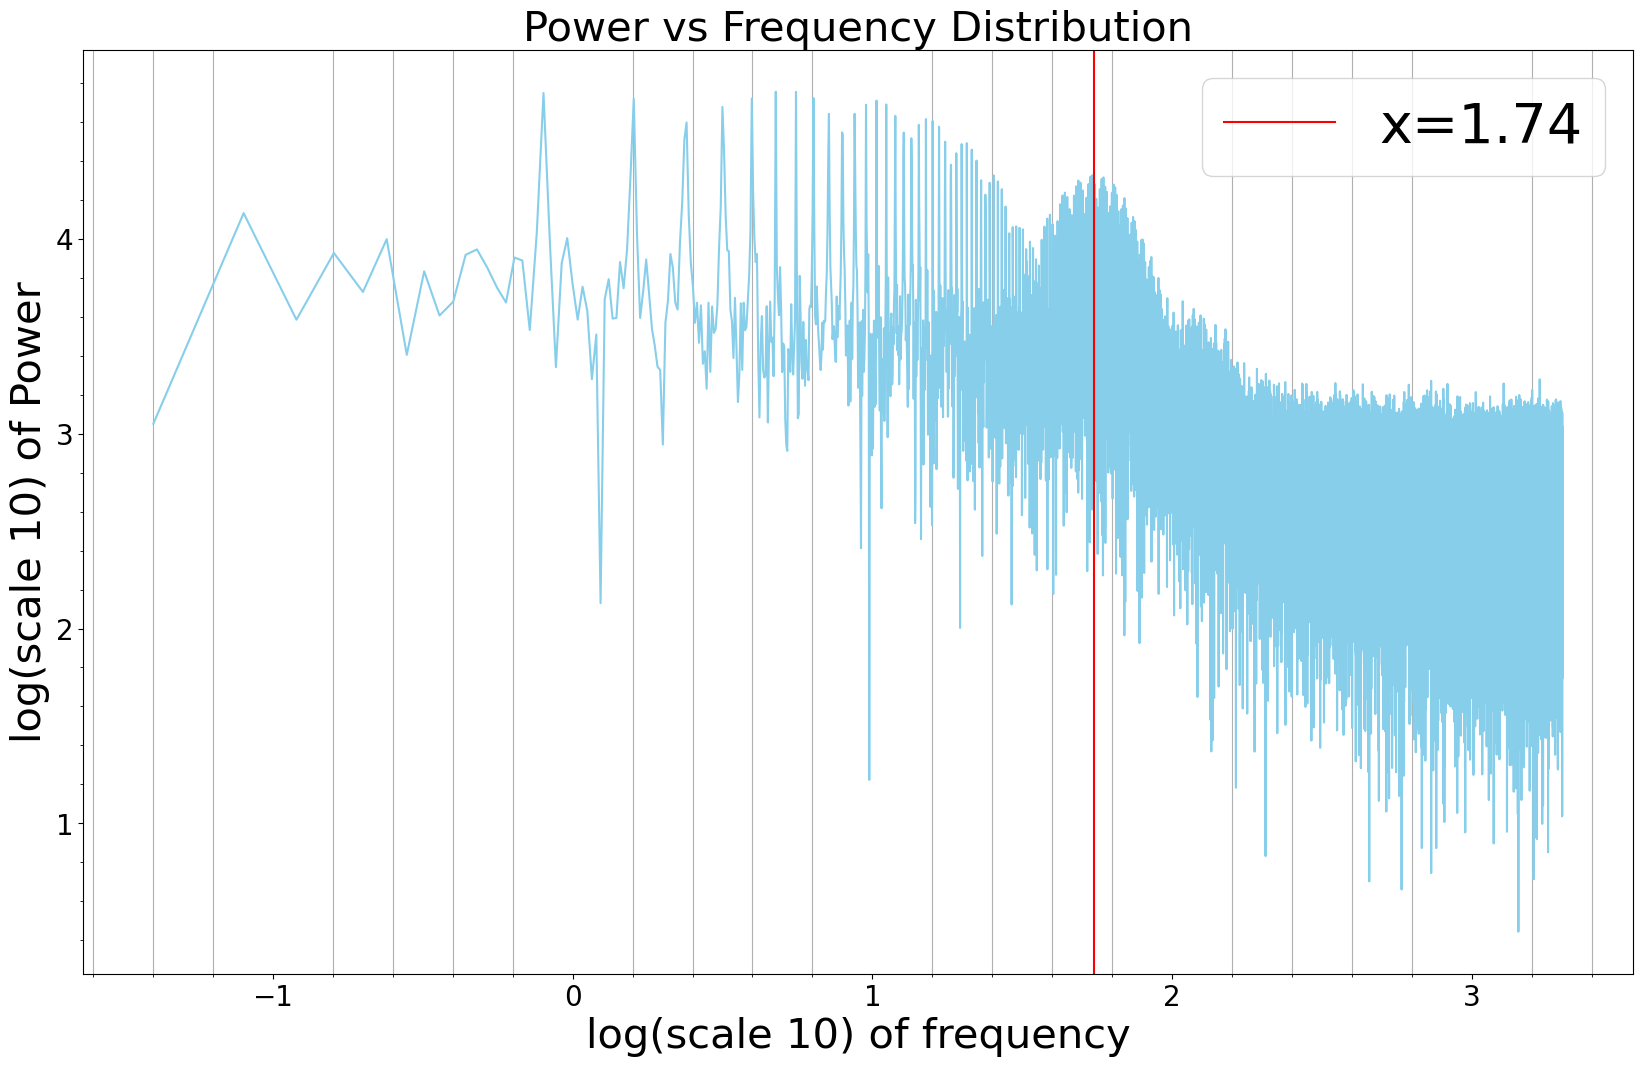

In [7]:
log_power = np.log10(Amplitude)
log_freq = np.log10(xf)
plt.figure(figsize=(20,12))
plt.plot(log_freq,log_power,c="skyblue")
plt.axvline(x=1.74, c="red", label="x=1.74")
plt.minorticks_on()
plt.grid(b=True, which='minor',axis='x')
plt.xlabel("log(scale 10) of frequency",fontsize=30)
plt.ylabel("log(scale 10) of Power",fontsize=30)
plt.title("Power vs Frequency Distribution",fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=40)
plt.savefig("FFT3.pdf")
plt.show()


# Time period and frequency of pulsar

In [8]:
#we get peak at 1.74(in log 10 base scale) on freq axis.so freq will be
freq_ = 10**1.74
time_period = 1/freq_
roteting_speed = 60/time_period
print("frequency of pulsar is", freq_,'per second (Hz)')
print("time period of pulsar is",time_period,'second')
print("rotating speed(in rpm) of pulsar is",roteting_speed )

frequency of pulsar is 54.954087385762456 per second (Hz)
time period of pulsar is 0.018197008586099832 second
rotating speed(in rpm) of pulsar is 3297.2452431457477


# Curve fitting of data

# linear fitting 

/tmp/ipykernel_15797/282287121.py:2: RuntimeWarning: divide by zero encountered in log10
  log_freq = np.log10(xf)
/tmp/ipykernel_15797/282287121.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor',axis='x')


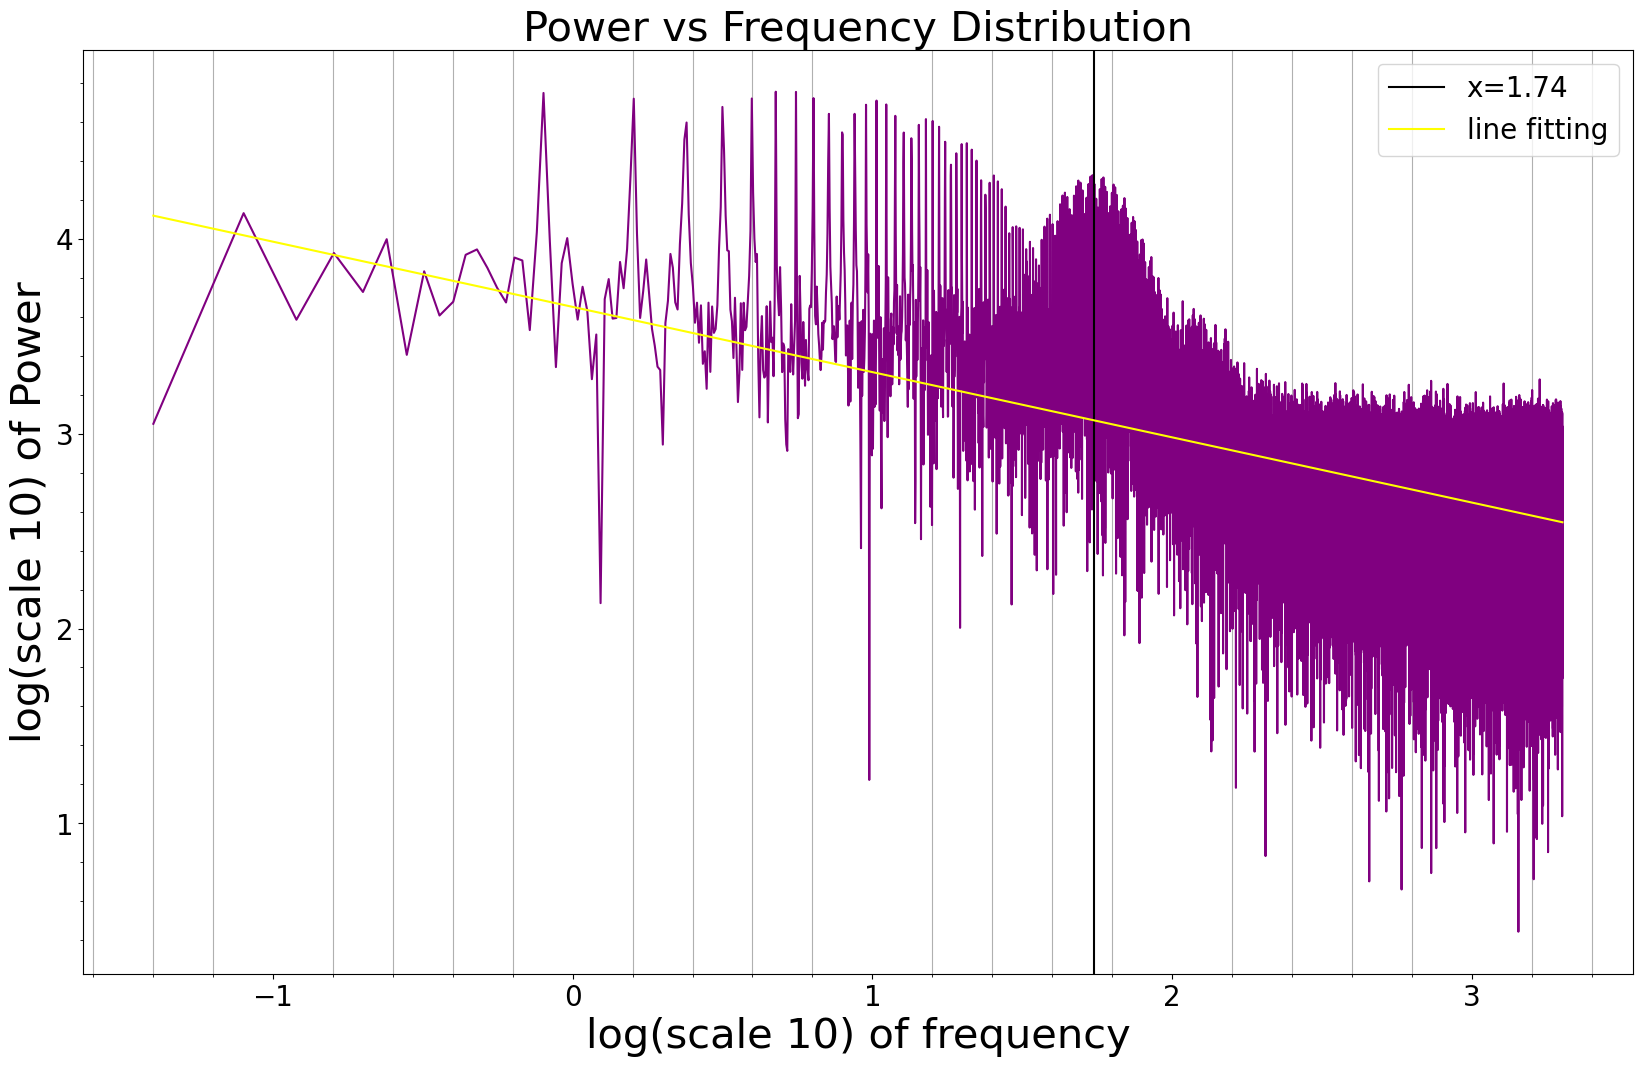

In [9]:

log_power = np.log10(Amplitude)
log_freq = np.log10(xf)

log_freq1 = np.delete(log_freq,0)
log_power1 = np.delete(log_power,0)

def lin(x, m , c):
    return m*x+c
const, const_cuv = curve_fit(lin, log_freq1, log_power1)
linear_data = lin(log_freq1,*const)

plt.figure(figsize=(20,12))
plt.plot(log_freq,log_power,c="purple")
plt.axvline(x=1.74, c="black", label="x=1.74")
plt.minorticks_on()
plt.grid(b=True, which='minor',axis='x')
plt.xlabel("log(scale 10) of frequency",fontsize=30)
plt.ylabel("log(scale 10) of Power",fontsize=30)
plt.title("Power vs Frequency Distribution",fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.plot(log_freq1,lin(log_freq1,*const),color='yellow',label='line fitting')
plt.legend(fontsize=20)
plt.savefig("FFT4.pdf")
plt.show()

# Gaussian fitting without linear trend

/tmp/ipykernel_15797/1646778805.py:19: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor',axis='x')


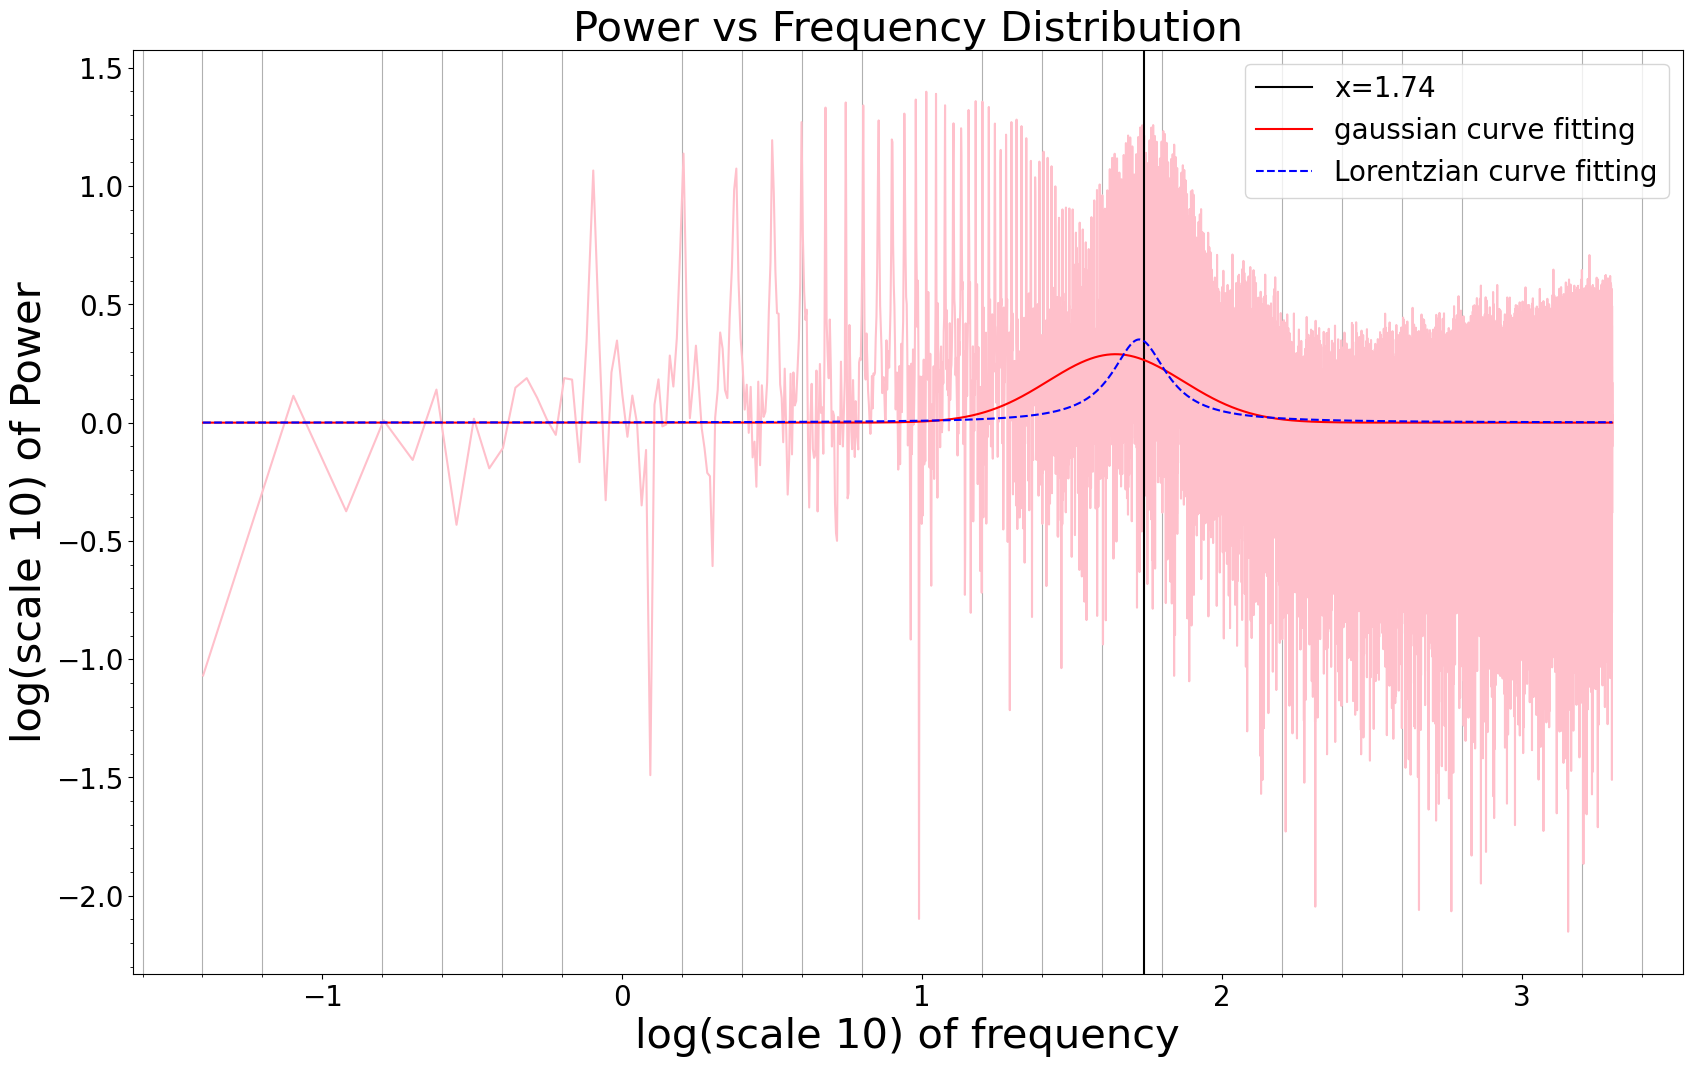

In [10]:

log_power2 = log_power1 - linear_data


def gauss(x,  a , b, c):
    return a * np.exp(-(x - b) ** 2 / (2*(c**2)))
const, const_cuv = curve_fit(gauss,log_freq1, log_power2)

def Lorentzian(x, amp,a ,c):
    return amp* (a**2)/((x-c)**2+a**2)
const1, const_cuv = curve_fit(Lorentzian,log_freq1, log_power2)




plt.figure(figsize=(20,12))
plt.plot(log_freq1,log_power2,c="pink")
plt.axvline(x=1.74, c="black", label="x=1.74")
plt.minorticks_on()
plt.grid(b=True, which='minor',axis='x')
plt.xlabel("log(scale 10) of frequency",fontsize=30)
plt.ylabel("log(scale 10) of Power",fontsize=30)
plt.title("Power vs Frequency Distribution",fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.plot(log_freq1,gauss(log_freq1,*const),color='red',label='gaussian curve fitting')

plt.plot(log_freq1,Lorentzian(log_freq1,*const1),color='blue',linestyle='dashed',label='Lorentzian curve fitting')

plt.legend(fontsize=20)
plt.savefig("FFT5.pdf")
plt.show()


In [11]:
lorentzian = Lorentzian(log_freq1,*const1)

log_power3 = log_power2 - lorentzian

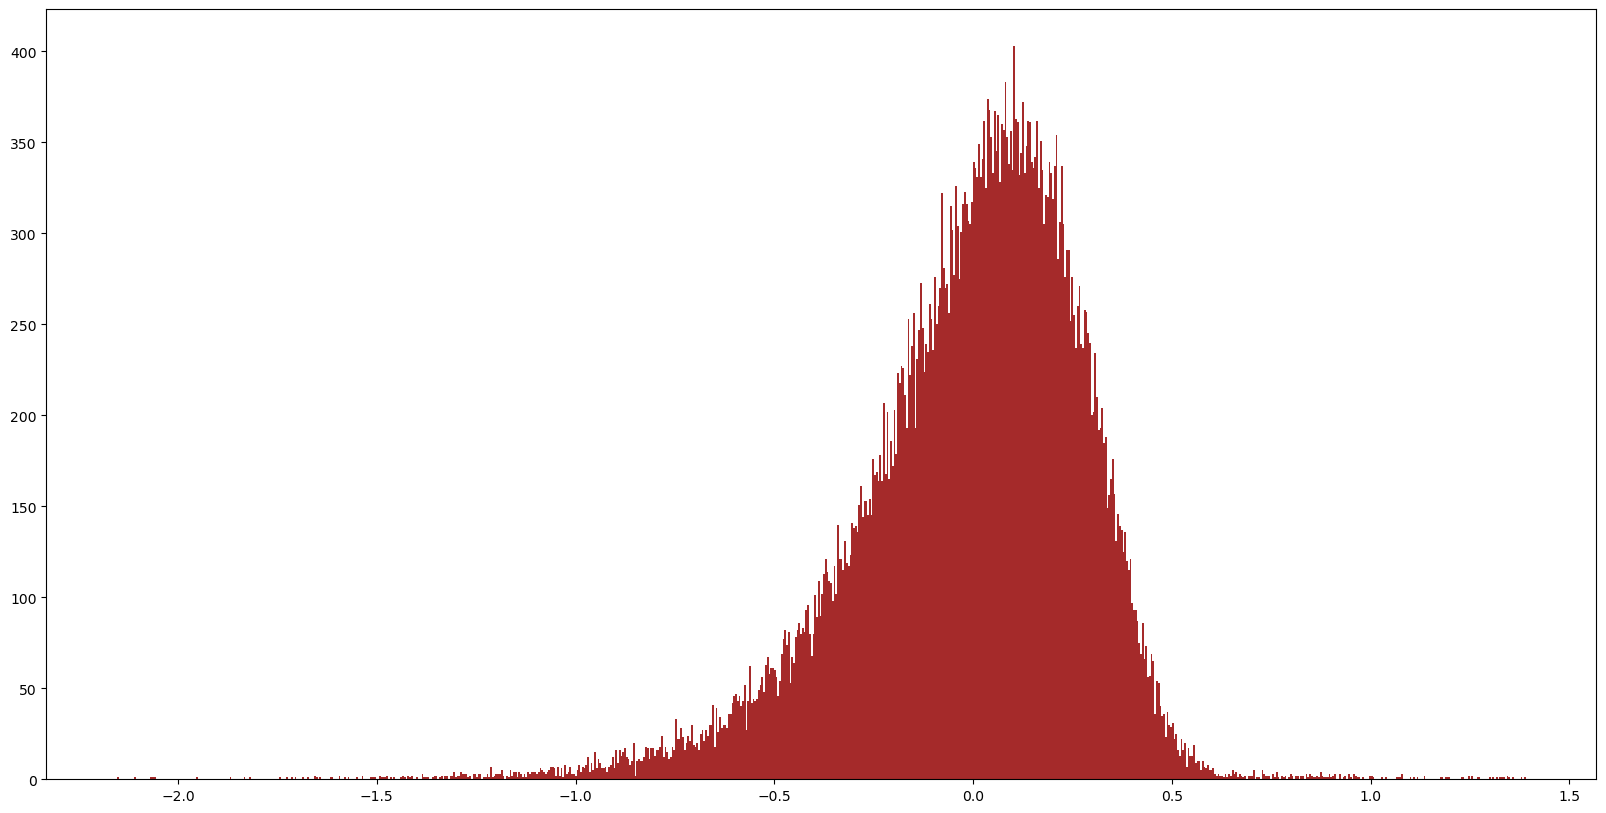

In [12]:
plt.figure(figsize=(20,10))
plt.hist(log_power3,color = 'brown',bins=800)
plt.show()

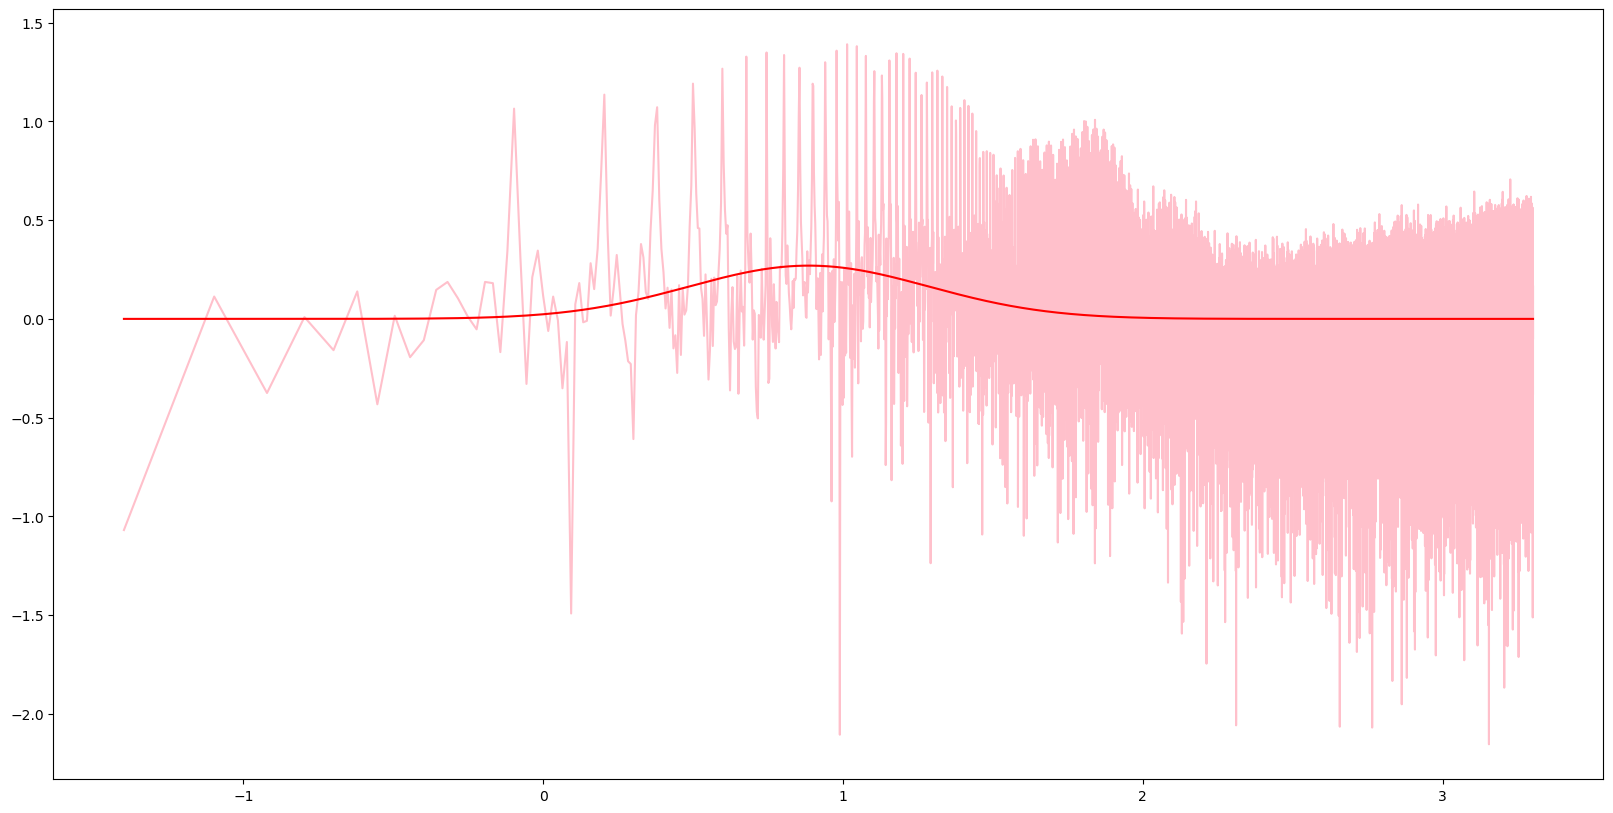

In [13]:
plt.figure(figsize=(20,10))
plt.plot(log_freq1,log_power3,c="pink")

def gauss(x,  a , b, c):
    return a * np.exp(-(x - b) ** 2 / (2*(c**2)))
const2, const_cuv = curve_fit(gauss,log_freq1, log_power3)
plt.plot(log_freq1,gauss(log_freq1,*const2),color='red',label='gaussian curve fitting')
